# General analysis from association rules

## Run all year-by-year notebooks to generate association rules

### Run analysis for 2016

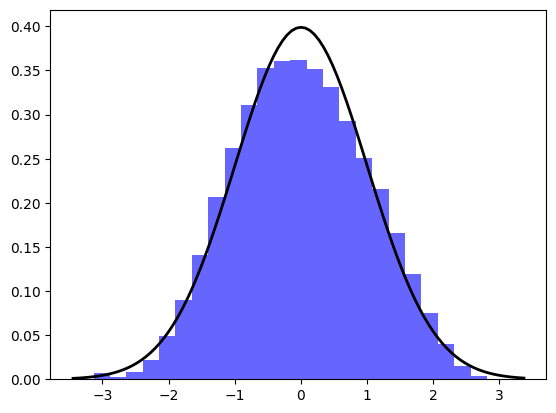

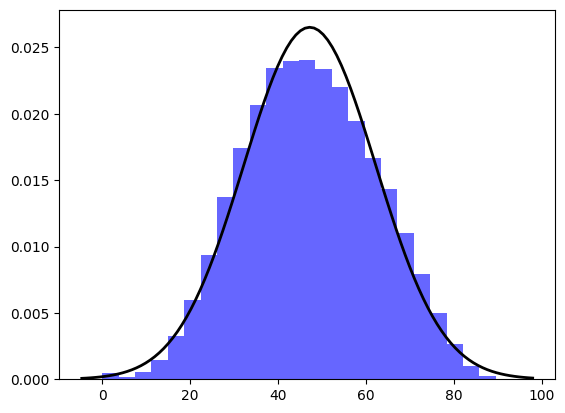

Time to run apriori: 0:10:14.585660
Time to run extractor: 0:00:10.539393
Count of itemsets: 22751
Count of association rules for support 10.0% and confidence 50.0%: 874059


In [1]:
%run 'analysis-2016.ipynb'

### Run analysis for 2017

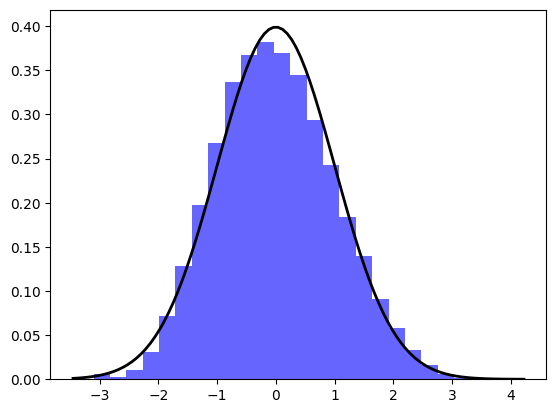

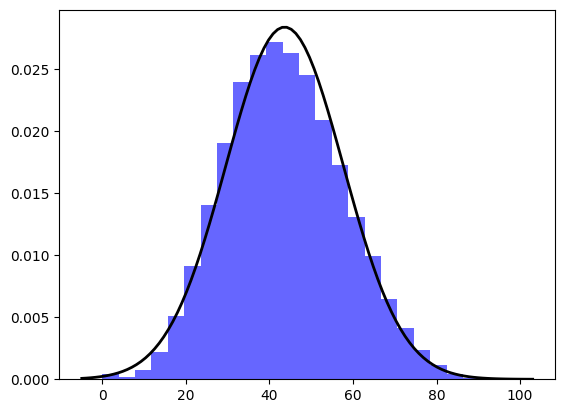

Time to run apriori: 0:03:18.025109
Time to run extractor: 0:00:01.326211
Count of itemsets: 8410
Count of association rules for support 10.0% and confidence 50.0%: 128655


In [2]:
%run 'analysis-2017.ipynb'

### Run analysis for 2018

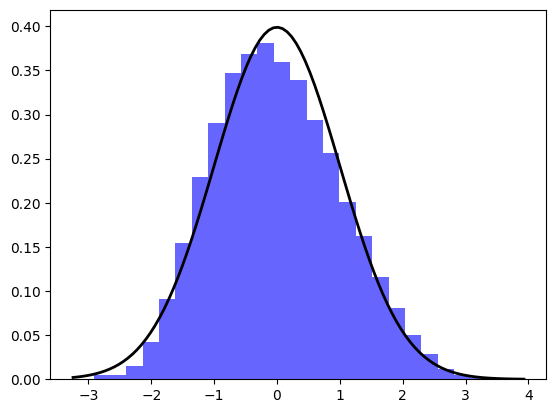

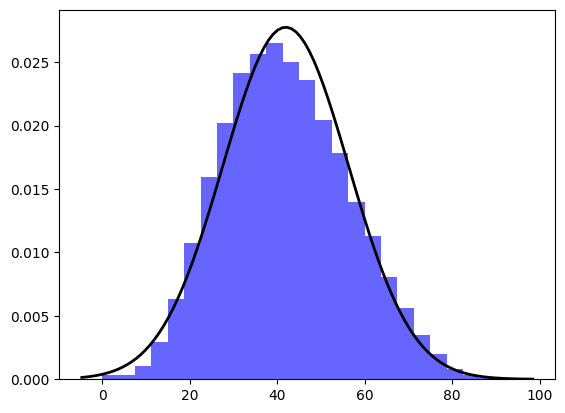

Time to run apriori: 0:06:24.153161
Time to run extractor: 0:00:02.533820
Count of itemsets: 11546
Count of association rules for support 10.0% and confidence 50.0%: 190341


In [3]:
%run 'analysis-2018.ipynb'

### Run analysis for 2019

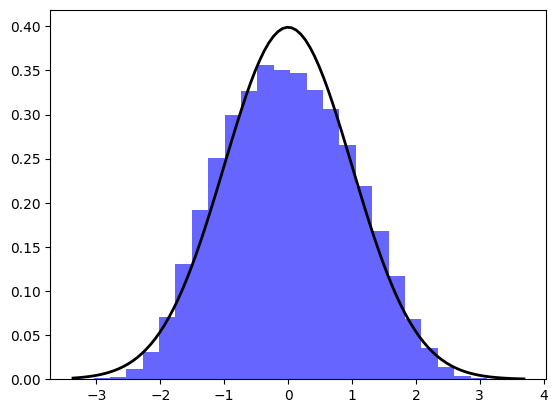

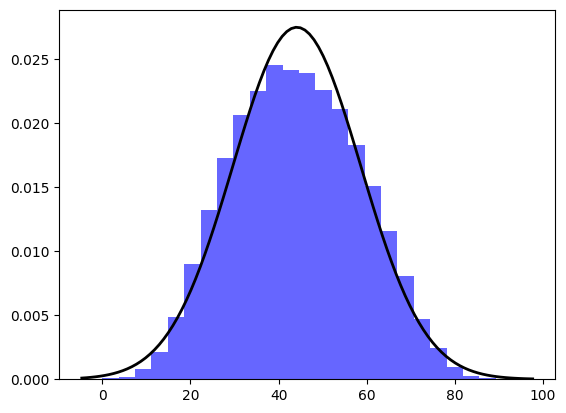

Time to run apriori: 0:12:59.929832
Time to run extractor: 0:00:06.671276
Count of itemsets: 19826
Count of association rules for support 10.0% and confidence 50.0%: 555626


In [4]:
%run 'analysis-2019.ipynb'

## Import all rules results

In [5]:
%run '../scripts/import-all-rules-results.py'

all_rules

,items_base,items_add,support,confidence,lift,year
0,[],['Bacharelado'],0.963979,0.963979,1.000000,2016
1,[],['Branca'],0.520308,0.520308,1.000000,2016
2,[],['EM: Todo em escola pública'],0.537059,0.537059,1.000000,2016
3,[],['Entre 17 e 25 anos'],0.519567,0.519567,1.000000,2016
4,[],['Feminino'],0.689297,0.689297,1.000000,2016
...,...,...,...,...,...,...
1748676,"['Não estou trabalhando', 'Não entrei por cota...",['NOTA: MUITO ACIMA DA MÉDIA'],0.104655,0.963542,1.652969,2019
1748677,"['Não estou trabalhando', 'Não entrei por cota...",['Entre 17 e 25 anos'],0.104655,0.811404,1.471754,2019
1748678,"['Não estou trabalhando', 'Não entrei por cota...",['EM: Todo em escola privada (particular)'],0.104655,0.848624,2.136495,2019
1748679,"['Não estou trabalhando', 'Não entrei por cota...",['Branca'],0.104655,0.755543,1.340947,2019


## ECDF - Support x Association Rules Qty

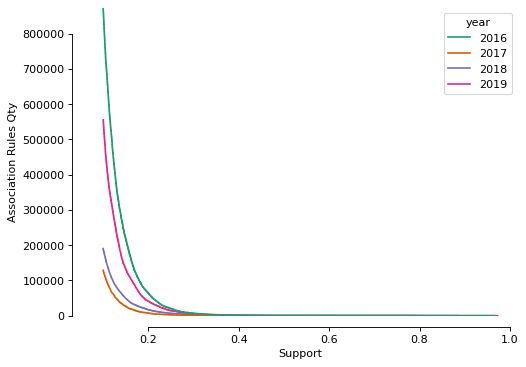

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", complementary=True, x="support", hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty

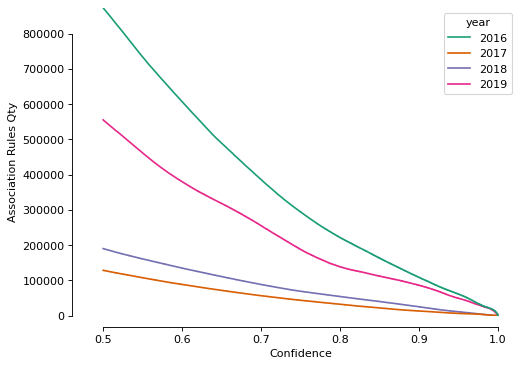

In [7]:
# charts
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confidence")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

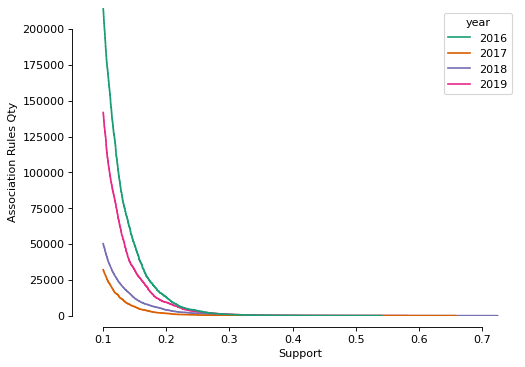

In [8]:
all_high_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="support", complementary=True,  hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

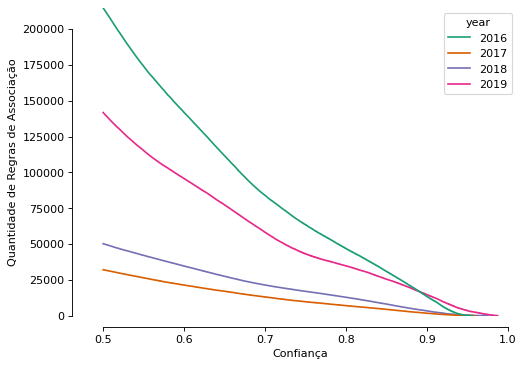

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

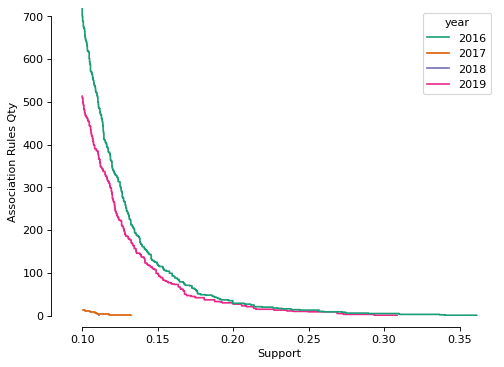

In [10]:
all_low_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="support", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

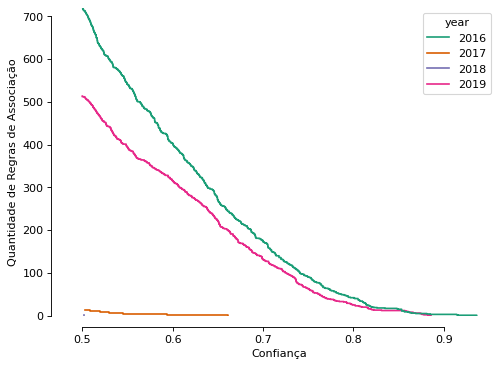

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## Filter by relevant rules (lift > 1.1)

In [12]:
relevant_rules_table_2016 = rules_table_2016.query("lift > 1.1")
relevant_rules_table_2017 = rules_table_2017.query("lift > 1.1")
relevant_rules_table_2018 = rules_table_2018.query("lift > 1.1")
relevant_rules_table_2019 = rules_table_2019.query("lift > 1.1")

print("2016: " + str(relevant_rules_table_2016['items_base'].count()))
print("2017: " + str(relevant_rules_table_2017['items_base'].count()))
print("2018: " + str(relevant_rules_table_2018['items_base'].count()))
print("2019: " + str(relevant_rules_table_2019['items_base'].count()))

2016: 820500
2017: 121115
2018: 163170
2019: 501579


## Recurring rules

In [13]:
intersec_16_17 = pd.merge(relevant_rules_table_2016, relevant_rules_table_2017, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_x', '_y'))
intersec_16_17_18 = pd.merge(intersec_16_17, relevant_rules_table_2018, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_z', '_w'))
intersec_all_years = pd.merge(intersec_16_17_18, relevant_rules_table_2019, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_a', '_b'))
intersec_all_years

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
0,['Classe Social B'],['Branca'],0.175363,0.710937,1.366377,2016,0.187465,0.713892,1.250337,2017,0.216724,0.717404,1.190371,2018,0.198723,0.726011,1.288535,2019
1,['EM: Todo em escola privada (particular)'],['Branca'],0.248295,0.674316,1.295992,2016,0.239462,0.704977,1.234723,2017,0.272626,0.707450,1.173855,2018,0.282285,0.710682,1.261327,2019
2,['Mãe: Ensino Superior - Graduação'],['Branca'],0.132671,0.656640,1.262020,2016,0.139862,0.686596,1.202529,2017,0.146583,0.710608,1.179095,2018,0.153548,0.681737,1.209955,2019
3,['Pai: Ensino Superior - Graduação'],['Branca'],0.127186,0.670312,1.288299,2016,0.130408,0.699582,1.225274,2017,0.140865,0.704406,1.168804,2018,0.140617,0.686932,1.219177,2019
4,['Sul'],['Branca'],0.152090,0.694181,1.334173,2016,0.168113,0.731253,1.280743,2017,0.169575,0.768783,1.275623,2018,0.147972,0.800262,1.420316,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58415,"['EM: Todo em escola privada (particular)', 'N...",['Não entrei por cotas'],0.111770,0.981771,1.228990,2016,0.115894,0.991909,1.252124,2017,0.110054,0.976190,1.249924,2018,0.133991,0.982810,1.282430,2019
58416,"['Não entrei por cotas', 'EM: Todo em escola p...",['NOTA: MUITO ACIMA DA MÉDIA'],0.111770,0.933168,1.723755,2016,0.115894,0.927046,1.407001,2017,0.110054,0.940648,1.298002,2018,0.133991,0.951234,1.631854,2019
58417,"['Não entrei por cotas', 'EM: Todo em escola p...",['Entre 17 e 25 anos'],0.111770,0.788703,1.518000,2016,0.115894,0.845779,1.694385,2017,0.110054,0.820357,1.496058,2018,0.133991,0.785038,1.423931,2019
58418,"['Não entrei por cotas', 'NOTA: MUITO ACIMA DA...",['EM: Todo em escola privada (particular)'],0.111770,0.795359,2.160020,2016,0.115894,0.771852,2.272338,2017,0.110054,0.756215,1.962334,2018,0.133991,0.829000,2.087090,2019


## Save results to a new CSV file

In [14]:
import os
intersec_all_years.to_csv('results/intersection-all-years.csv')

## View data of interest

In [15]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
7,['Classe Social B'],['NOTA: MUITO ACIMA DA MÉDIA'],0.208272,0.844351,1.559691,2016,0.228117,0.868700,1.318447,2017,0.266558,0.882364,1.217576,2018,0.228301,0.834071,1.430861,2019
14,['EM: Todo em escola privada (particular)'],['NOTA: MUITO ACIMA DA MÉDIA'],0.305514,0.829710,1.532646,2016,0.286620,0.843811,1.280673,2017,0.338216,0.877650,1.211071,2018,0.332390,0.836826,1.435587,2019
29,['Entre 17 e 25 anos'],['NOTA: MUITO ACIMA DA MÉDIA'],0.378595,0.728673,1.346010,2016,0.394506,0.790330,1.199503,2017,0.448270,0.817495,1.128063,2018,0.415791,0.754178,1.293802,2019
39,['Mãe: Ensino Superior - Graduação'],['NOTA: MUITO ACIMA DA MÉDIA'],0.156389,0.774028,1.429790,2016,0.163497,0.802621,1.218157,2017,0.174009,0.843564,1.164036,2018,0.173590,0.770721,1.322183,2019
44,['Mãe: Pós-graduação'],['NOTA: MUITO ACIMA DA MÉDIA'],0.114290,0.828142,1.529749,2016,0.101824,0.866131,1.314548,2017,0.125693,0.888981,1.226706,2018,0.134233,0.828429,1.421181,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58390,"['EM: Todo em escola privada (particular)', 'S...","['Não entrei por cotas', 'NOTA: MUITO ACIMA DA...",0.111770,0.917275,2.119882,2016,0.115894,0.916447,1.756507,2017,0.110054,0.917315,1.655960,2018,0.133991,0.931984,2.161644,2019
58396,"['Não entrei por cotas', 'EM: Todo em escola p...","['NOTA: MUITO ACIMA DA MÉDIA', 'Entre 17 e 25 ...",0.111770,0.723608,1.911301,2016,0.115894,0.765895,1.941404,2017,0.110054,0.762020,1.699914,2018,0.133991,0.732332,1.761298,2019
58402,"['Não entrei por cotas', 'Solteiro(a)', 'Entre...","['EM: Todo em escola privada (particular)', 'N...",0.111770,0.721531,2.361693,2016,0.115894,0.697456,2.433384,2017,0.110054,0.692364,2.047109,2018,0.133991,0.763000,2.295494,2019
58409,"['Não entrei por cotas', 'Solteiro(a)', 'Entre...","['Branca', 'NOTA: MUITO ACIMA DA MÉDIA']",0.111770,0.675022,1.924641,2016,0.115894,0.687335,1.618180,2017,0.110054,0.707162,1.512371,2018,0.133991,0.716818,1.837942,2019


In [16]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b


## Generate WordCloud for NOTAS MUITO ACIMA DA MÉDIA

In [17]:
all_high = intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

xss = all_high['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words = ''.join(flat_list)

words = words.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "").replace("(", "").replace(")", "")

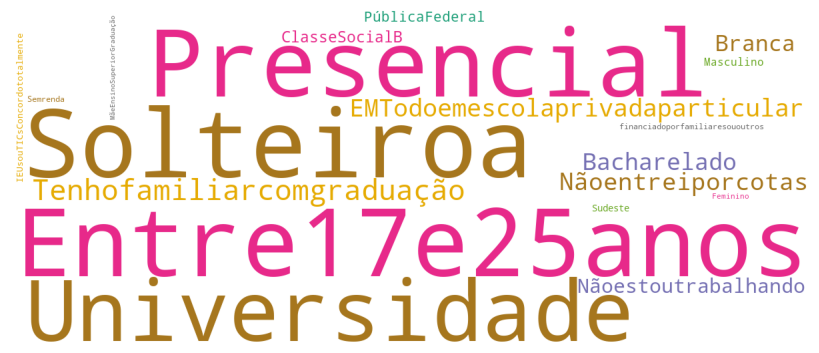

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words)
                 
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()

## Generate WordCloud for NOTAS MUITO ABAIXO DA MÉDIA

### 🔴 Not generated because we don't have persistent rules 🔴

## Generate WordCloud for NOTAS MUITO ABAIXO DA MÉDIA only for 2016 and 2019

In [19]:
intersec_16_19 = pd.merge(relevant_rules_table_2016, relevant_rules_table_2019, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_a', '_b'))
intersec_16_19.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

,items_base,items_add,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
10,['Casado(a)'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.127779,0.745030,1.624426,2016,0.106999,0.735964,1.764546,2019
19,['Classe Social D'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.141565,0.600629,1.309581,2016,0.135607,0.579620,1.389695,2019
21,['Classe Social E'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.171064,0.762723,1.663003,2016,0.113868,0.687988,1.649519,2019
38,['EM: Todo em escola pública'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.336940,0.627381,1.367909,2016,0.308712,0.587964,1.409700,2019
57,['Entre 26 e 33 anos'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.145864,0.523683,1.141811,2016,0.154598,0.534059,1.280459,2019
...,...,...,...,...,...,...,...,...,...,...
77731,"['Não entrei por cotas', 'EM: Todo em escola p...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Bacharelado']",0.114290,0.615323,1.446835,2016,0.111120,0.687500,1.723835,2019
77733,"['IE Usou TICs: Concordo totalmente', 'Não ent...",['NOTA: MUITO ABAIXO DA MÉDIA'],0.114290,0.651733,1.421005,2016,0.111120,0.702965,1.685428,2019
77740,"['EM: Todo em escola pública', 'Bacharelado', ...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Presencial']",0.113401,0.503289,1.439250,2016,0.135849,0.648784,1.739557,2019
77743,"['Não entrei por cotas', 'EM: Todo em escola p...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Bacharelado']",0.113401,0.558394,1.312976,2016,0.135849,0.672400,1.685973,2019


In [20]:
all_low = intersec_16_19.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

xss = all_low['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words2 = ''.join(flat_list)

words2 = words2.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "")

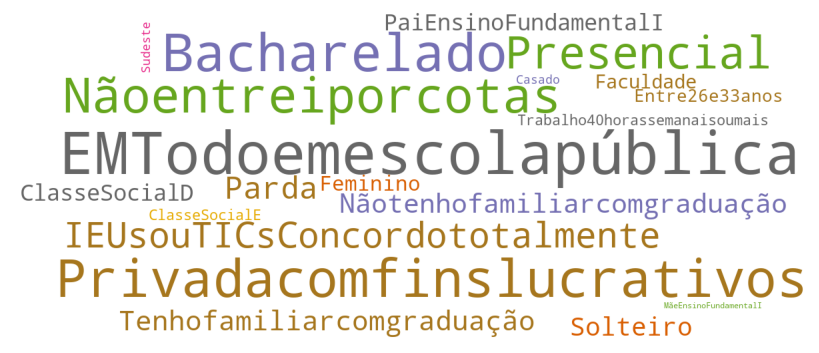

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words2)
                    
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()